<a href="https://colab.research.google.com/github/ayman86/Photo_Quality_Classification/blob/main/simpel_net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import os
import random
import matplotlib.pylab as plt
from glob import glob
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
def proc_image_dir(Images_Path):
    
    image_classes = sorted([dirname for dirname in os.listdir(Images_Path)
                      if os.path.isdir(os.path.join(Images_Path, dirname))])
    # and not dirname.startswith(".") and not dirname.startswith("mblur")])
    #image_classes.append('mblur')
    
    print(image_classes)
    
    x = [] # images as arrays
    y = [] # labels Infiltration or Not_infiltration
    WIDTH = 256
    HEIGHT = 256
  
    print("Adding Images: ",end="")
    i = 0
    for image_class in image_classes:
        print("Processing ", image_class)
        items = glob(os.path.join(Images_Path, image_class,"*"))
        for item in items:
            if item.lower().endswith(".jpg") or item.lower().endswith(".bmp"):
                # Read and resize image
                full_size_image = cv2.imread(item)
                x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))
                out = [0] * len(image_classes)
                out[i] = 1
                y.append(out)
        i+=1

    print("")
    return x,y,image_classes

def horizontal_motion_blur(img, blur_factor):
    import cv2 
    import numpy as np 

    kernel_size = blur_factor
    kernel_h = np.zeros((kernel_size, kernel_size))
    kernel_h[int((kernel_size - 1)/2), :] = np.ones(kernel_size) 
    kernel_h /= kernel_size 

    # Apply the horizontal kernel. 
    horizontal_mb = cv2.filter2D(img, -1, kernel_h) 
    
    return horizontal_mb

In [3]:
# ./input/
PATH = os.path.abspath(os.path.join('.', 'databaserelease2'))

# ./input/sample/images/
SOURCE_IMAGES = '/content/drive/MyDrive/Datasets - Copy/First Dataset'#os.path.join(PATH, "sample", "images")
x2,y2,image_classes = proc_image_dir(SOURCE_IMAGES)


['bad_lighting', 'fastfading', 'gblur', 'jp2k', 'jpeg', 'refimgs']
Adding Images: Processing  bad_lighting
Processing  fastfading
Processing  gblur
Processing  jp2k
Processing  jpeg
Processing  refimgs



In [4]:
for i in range(0,len(x2)):
    if(y2[i][2] > 0):
        # Specify the kernel size. 
        # The greater the size, the more the motion. 
        
        random.seed(221234)
        kernel_size_h = random.randrange(30, 60, 5)


        # Apply the horizontal kernel. 
        horizonal_mb = horizontal_motion_blur(x2[i],kernel_size_h)
        
        x2.append(horizonal_mb)
        y2.append([0,0,0,0,0,1])

print(image_classes)

['bad_lighting', 'fastfading', 'gblur', 'jp2k', 'jpeg', 'refimgs']


In [5]:
# First split the data in two sets, 80% for training, 20% for Val/Test)
X_train, X_valtest, y_train, y_valtest = train_test_split(x2,y2, test_size=0.20, random_state=1, stratify=y2)

# Second split the 40% into validation and test sets
X_test, X_val, y_test, y_val = train_test_split(X_valtest, y_valtest, test_size=0.5, random_state=1, stratify=y_valtest)

print(np.array(X_train).shape)
print(np.array(X_val).shape)
print(np.array(X_test).shape)

(962, 256, 256, 3)
(121, 256, 256, 3)
(120, 256, 256, 3)


In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras import backend as K
import tensorflow.keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import os
from tensorflow.keras.layers import Input, Dense, Activation,Flatten,Conv2D,MaxPool2D,Dropout
from tensorflow.keras.models import Model
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.traceback_utils import include_frame
import matplotlib.pyplot as plt
import numpy as np

num_classes=6

K.image_data_format()

img_width, img_height = 256, 256
nb_train_samples = len(X_train)
nb_validation_samples = len(X_val)
batch_size = 16

In [27]:
input_shape = (256,256,3)

#creat the network
#input layer
img_input = Input(shape=input_shape,name = 'img_input')

#conv_layer
l1 = Conv2D(32,(3,3),padding='same',activation='relu',name='l1')(img_input)
l1 = Conv2D(64,(3,3),padding='same',activation='relu',name='l2')(l1)
l1 = MaxPool2D((2,2),strides=(2,2),name='l3')(l1)
#l1 = Dropout(0.2)(l1)

l1 = Conv2D(64,(3,3),padding='same',activation='relu',name='l4')(l1)
l1 = MaxPool2D((2,2),strides=(2,2),name='l5')(l1)
#l1 = Dropout(0.2)(l1)

l1 = Conv2D(128,(3,3),padding='same',activation='relu',name='l6')(l1)
l1 = MaxPool2D((2,2),strides=(2,2),name='l7')(l1)
#l1 = Dropout(0.3)(l1)

l1 = Conv2D(128,(3,3),padding='same',activation='relu',name='l8')(l1)
l1 = MaxPool2D((2,2),strides=(2,2),name='l9')(l1)
#l1 = Dropout(0.3)(l1)

l1 = Conv2D(256,(3,3),padding='same',activation='relu',name='l10')(l1)
l1 = MaxPool2D((2,2),strides=(2,2),name='l11')(l1)
#l1 = Dropout(0.4)(l1)

l1 = Conv2D(256,(3,3),padding='same',activation='relu',name='l12')(l1)
l1 = MaxPool2D((2,2),strides=(2,2),name='l13')(l1)
#l1 = Dropout(0.4)(l1)

l1 = Flatten(name='fc1')(l1)
l1 = Dense(64,name='l14')(l1)
l1 = Dropout(0.5)(l1)

l1 = Dense(6,activation='sigmoid',name='predictions')(l1)

model = Model(inputs=img_input,outputs=l1,name='Binary_classification')
model.summary()




Model: "Binary_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img_input (InputLayer)      [(None, 256, 256, 3)]     0         
                                                                 
 l1 (Conv2D)                 (None, 256, 256, 32)      896       
                                                                 
 l2 (Conv2D)                 (None, 256, 256, 64)      18496     
                                                                 
 l3 (MaxPooling2D)           (None, 128, 128, 64)      0         
                                                                 
 l4 (Conv2D)                 (None, 128, 128, 64)      36928     
                                                                 
 l5 (MaxPooling2D)           (None, 64, 64, 64)        0         
                                                                 
 l6 (Conv2D)                 (None, 64, 64, 1

In [28]:
model.compile(
	loss='binary_crossentropy',
	optimizer=optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0),
	metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [9]:
train_datagen = ImageDataGenerator(rescale=1. / 255, 
                                   rotation_range=15,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.01,
                                   zoom_range=[0.9, 1.25],
                                   horizontal_flip=True,
                                   vertical_flip=False,
                                   fill_mode='reflect')
valtest_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow(np.array(X_train), y_train, batch_size=batch_size)
validation_generator = valtest_datagen.flow(np.array(X_val), y_val, batch_size=batch_size)
test_generator = valtest_datagen.flow(np.array(X_test), y_test, batch_size=batch_size)

history = model.fit(np.array(X_train), np.array(y_train), validation_data=(np.array(X_val), np.array(y_val)), epochs=50)


Epoch 1/50
31/31 [==============================] - 11s 173ms/step - loss: 0.7297 - acc: 0.2890 - val_loss: 0.7603 - val_acc: 0.1983
Epoch 2/50
31/31 [==============================] - 4s 136ms/step - loss: 0.6739 - acc: 0.3857 - val_loss: 0.7078 - val_acc: 0.1983
Epoch 3/50
31/31 [==============================] - 4s 127ms/step - loss: 0.6350 - acc: 0.4480 - val_loss: 0.7143 - val_acc: 0.1983
Epoch 4/50
31/31 [==============================] - 4s 125ms/step - loss: 0.6133 - acc: 0.4605 - val_loss: 0.6735 - val_acc: 0.1653
Epoch 5/50
31/31 [==============================] - 4s 126ms/step - loss: 0.5936 - acc: 0.5052 - val_loss: 0.6527 - val_acc: 0.1653
Epoch 6/50
31/31 [==============================] - 4s 127ms/step - loss: 0.5735 - acc: 0.5457 - val_loss: 0.6284 - val_acc: 0.1653
Epoch 7/50
31/31 [==============================] - 4s 128ms/step - loss: 0.5620 - acc: 0.5322 - val_loss: 0.5987 - val_acc: 0.2397
Epoch 8/50
31/31 [==============================] - 4s 127ms/step - loss: 0

In [10]:
model.save_weights('/content/drive/MyDrive/Datasets - Copy/8020weights.h5')


In [11]:
model.load_weights('/content/drive/MyDrive/Datasets - Copy/8020weights.h5')


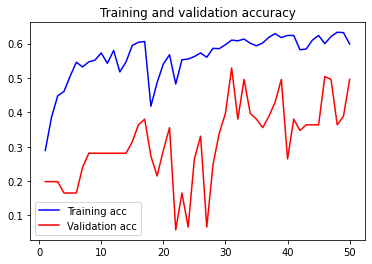

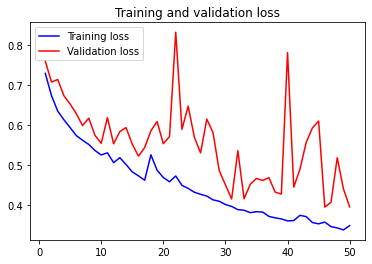

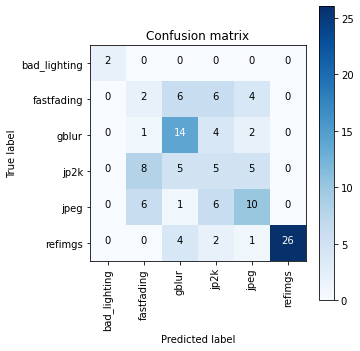

In [12]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'blue', label='Training acc')
plt.plot(epochs, val_acc, 'red', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig("/content/drive/MyDrive/Datasets - Copy/trvlAcc.png")
plt.show()

plt.figure()
plt.plot(epochs, loss, 'blue', label='Training loss')
plt.plot(epochs, val_loss, 'red', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig("/content/drive/MyDrive/Datasets - Copy/trvlLoss.png")
plt.show()

import sklearn
import itertools
from sklearn.metrics import confusion_matrix
dict_characters = {0: 'Clear', 1: 'Blurry'}
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.figure(figsize = (5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig("/content/drive/MyDrive/Datasets - Copy/cm-"+title+".png")
    plt.show()

    
a=np.array(X_test)
b=np.array(y_test)
Y_pred = model.predict(a)


Y_pred_classes = np.argmax(Y_pred,axis=1)
confusion_mtx = confusion_matrix(np.argmax(b,axis=1), Y_pred_classes) 
plot_confusion_matrix(confusion_mtx, classes = list(image_classes))

In [13]:
sklearn.metrics.accuracy_score(Y_pred_classes,np.argmax(b,axis=1))


0.49166666666666664

In [14]:
confusion_mtx


array([[ 2,  0,  0,  0,  0,  0],
       [ 0,  2,  6,  6,  4,  0],
       [ 0,  1, 14,  4,  2,  0],
       [ 0,  8,  5,  5,  5,  0],
       [ 0,  6,  1,  6, 10,  0],
       [ 0,  0,  4,  2,  1, 26]])

In [15]:
class_totals = [sum(i) for i in confusion_mtx]
class_totals

[2, 18, 21, 23, 23, 33]

In [16]:
class_correct_pred = [confusion_mtx[i][i] for i in range(6)]
class_correct_pred

[2, 2, 14, 5, 10, 26]

In [17]:
accuracies = [class_correct_pred[i]/class_totals[i] for i in range(6)]
accuracies

[1.0,
 0.1111111111111111,
 0.6666666666666666,
 0.21739130434782608,
 0.43478260869565216,
 0.7878787878787878]

In [18]:
class_totals = [sum(i) for i in confusion_mtx]
class_totals

tp = [confusion_mtx[i][i] for i in range(6)]
tp

sensetivity = [tp[i]/class_totals[i] for i in range(6)]
sensetivity

[1.0,
 0.1111111111111111,
 0.6666666666666666,
 0.21739130434782608,
 0.43478260869565216,
 0.7878787878787878]

In [19]:
fp = [[sum(x) for x in zip(*confusion_mtx)][i] - tp[i] for i in range(6)]
fp

[0, 15, 16, 18, 12, 0]

In [20]:
sumall = sum(map(sum, confusion_mtx))
print(sumall)
tn = [sumall - [sum(x) for x in zip(*confusion_mtx)][i] for i in range(6)]
tn
specificity = [tn[i]/(tn[i]+fp[i]) for i in range(6)]
specificity

120


[1.0,
 0.8728813559322034,
 0.8490566037735849,
 0.8434782608695652,
 0.8909090909090909,
 1.0]

In [21]:
train_datagen = ImageDataGenerator(rescale=1. / 255, 
                                   rotation_range=15,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.01,
                                   zoom_range=[0.9, 1.25],
                                   horizontal_flip=True,
                                   vertical_flip=False,
                                   fill_mode='reflect')
valtest_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow(np.array(X_train), y_train, batch_size=batch_size)
validation_generator = valtest_datagen.flow(np.array(X_val), y_val, batch_size=batch_size)
test_generator = valtest_datagen.flow(np.array(X_test), y_test, batch_size=batch_size)

history = model.fit(np.array(X_train), np.array(y_train), validation_data=(np.array(X_val), np.array(y_val)), epochs=250)


Epoch 1/250
31/31 [==============================] - 4s 127ms/step - loss: 0.3369 - acc: 0.6351 - val_loss: 0.4405 - val_acc: 0.3884
Epoch 2/250
31/31 [==============================] - 4s 126ms/step - loss: 0.3314 - acc: 0.6362 - val_loss: 0.3712 - val_acc: 0.5124
Epoch 3/250
31/31 [==============================] - 4s 126ms/step - loss: 0.3270 - acc: 0.6424 - val_loss: 0.3766 - val_acc: 0.5455
Epoch 4/250
31/31 [==============================] - 4s 126ms/step - loss: 0.3226 - acc: 0.6455 - val_loss: 0.3612 - val_acc: 0.5207
Epoch 5/250
31/31 [==============================] - 4s 126ms/step - loss: 0.3214 - acc: 0.6570 - val_loss: 0.3556 - val_acc: 0.5289
Epoch 6/250
31/31 [==============================] - 4s 125ms/step - loss: 0.3136 - acc: 0.6632 - val_loss: 0.4008 - val_acc: 0.4959
Epoch 7/250
31/31 [==============================] - 4s 126ms/step - loss: 0.3404 - acc: 0.5956 - val_loss: 0.4138 - val_acc: 0.4711
Epoch 8/250
31/31 [==============================] - 4s 126ms/step - 

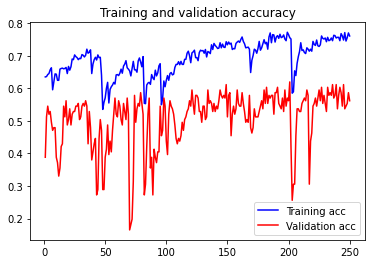

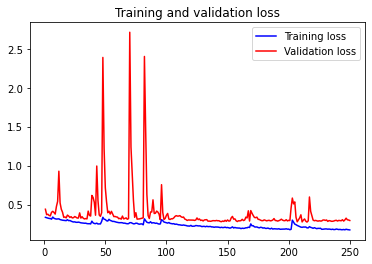

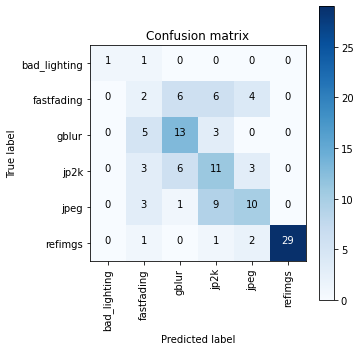

In [22]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'blue', label='Training acc')
plt.plot(epochs, val_acc, 'red', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig("/content/drive/MyDrive/Datasets - Copy/trvlAcc1.png")
plt.show()

plt.figure()
plt.plot(epochs, loss, 'blue', label='Training loss')
plt.plot(epochs, val_loss, 'red', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig("/content/drive/MyDrive/Datasets - Copy/trvlLoss1.png")
plt.show()

import sklearn
import itertools
from sklearn.metrics import confusion_matrix
dict_characters = {0: 'Clear', 1: 'Blurry'}
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.figure(figsize = (5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig("/content/drive/MyDrive/Datasets - Copy/cm-"+title+".png")
    plt.show()

    
a=np.array(X_test)
b=np.array(y_test)
Y_pred = model.predict(a)


Y_pred_classes = np.argmax(Y_pred,axis=1)
confusion_mtx = confusion_matrix(np.argmax(b,axis=1), Y_pred_classes) 
plot_confusion_matrix(confusion_mtx, classes = list(image_classes))

In [23]:
sklearn.metrics.accuracy_score(Y_pred_classes,np.argmax(b,axis=1))


0.55

In [24]:
confusion_mtx


array([[ 1,  1,  0,  0,  0,  0],
       [ 0,  2,  6,  6,  4,  0],
       [ 0,  5, 13,  3,  0,  0],
       [ 0,  3,  6, 11,  3,  0],
       [ 0,  3,  1,  9, 10,  0],
       [ 0,  1,  0,  1,  2, 29]])

In [25]:
accuracies = [class_correct_pred[i]/class_totals[i] for i in range(6)]
accuracies

[1.0,
 0.1111111111111111,
 0.6666666666666666,
 0.21739130434782608,
 0.43478260869565216,
 0.7878787878787878]

In [26]:
sumall = sum(map(sum, confusion_mtx))
print(sumall)
tn = [sumall - [sum(x) for x in zip(*confusion_mtx)][i] for i in range(6)]
tn
specificity = [tn[i]/(tn[i]+fp[i]) for i in range(6)]
specificity

120


[1.0, 0.875, 0.8545454545454545, 0.8333333333333334, 0.8938053097345132, 1.0]